In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset as netcdf_dataset
import netCDF4 as nc


%matplotlib inline



In [11]:
data = nc.Dataset('data1.nc', mode ='r')
print(type(data)) # print the type of the data 
print(data.variables.keys()) # print the variables in the data

<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['time', 'longitude', 'latitude', 'TMP_2m'])


In [12]:
# Spatial information
lats = data.variables['latitude'][:]  
longs = data.variables['longitude'][:]
# Temporal information
time = data.variables['time'][:]
temp = data.variables['TMP_2m'][:]

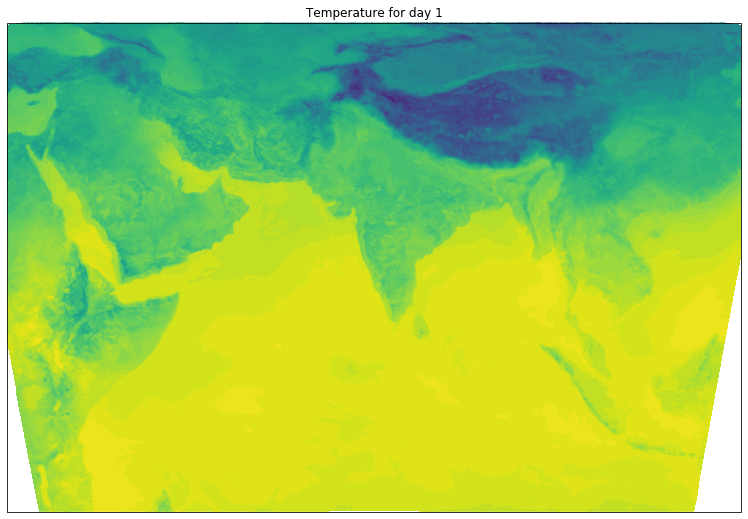

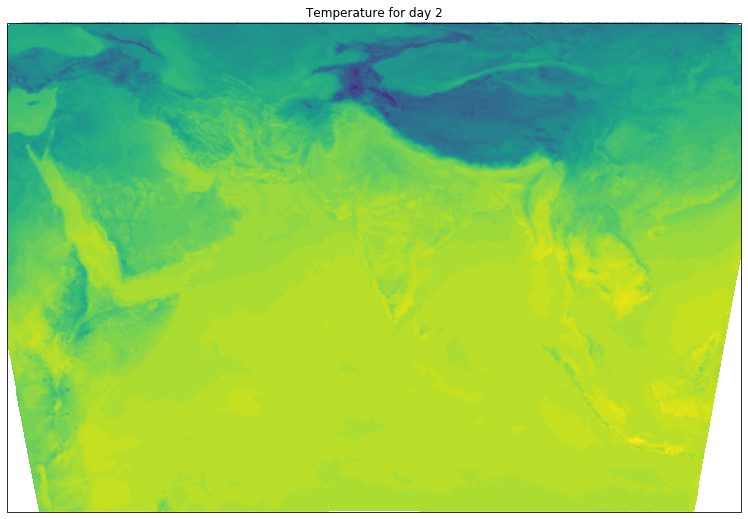

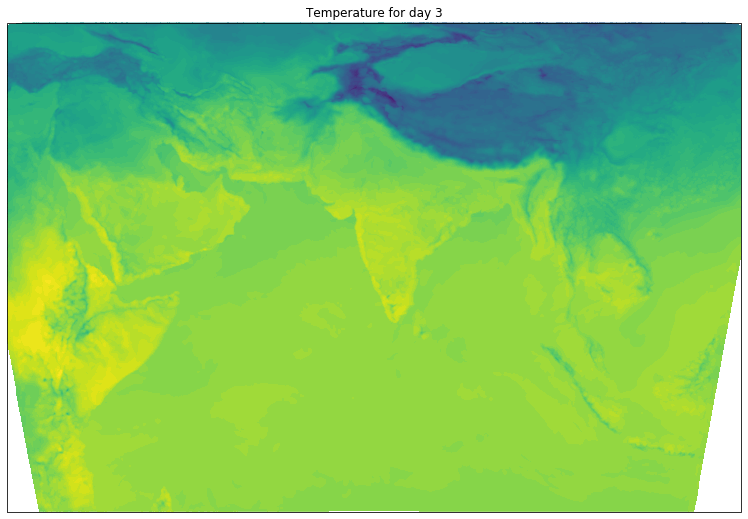

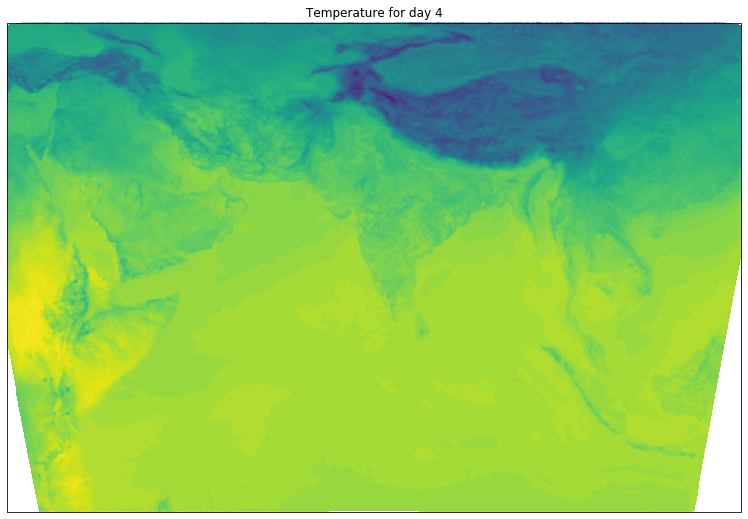

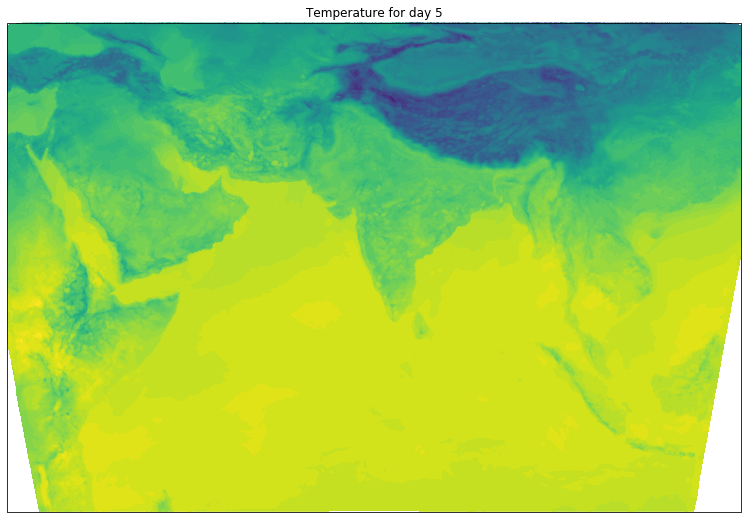

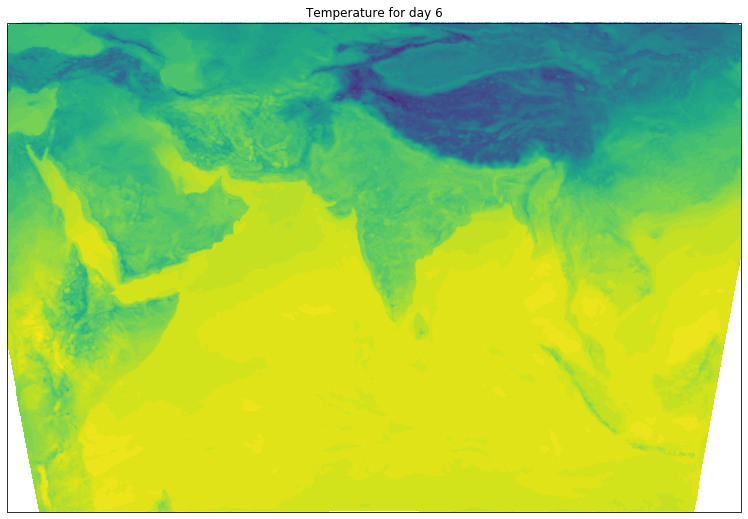

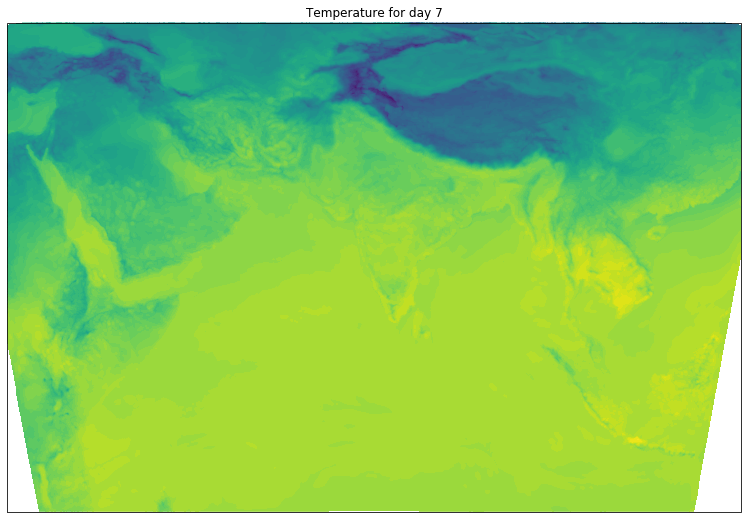

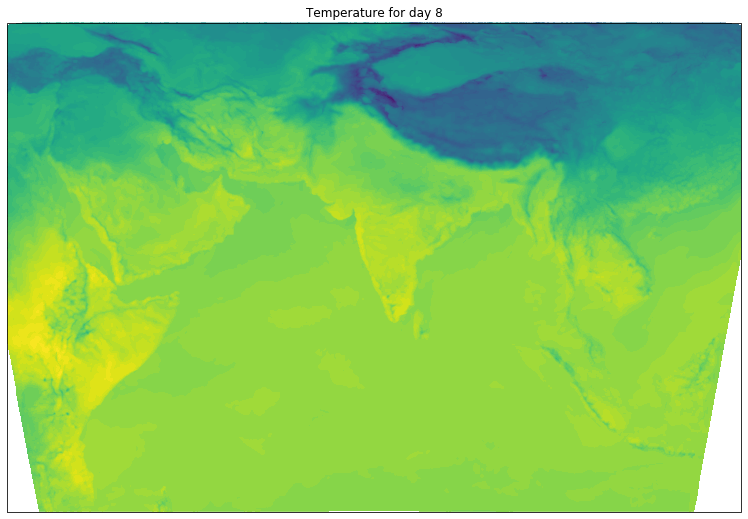

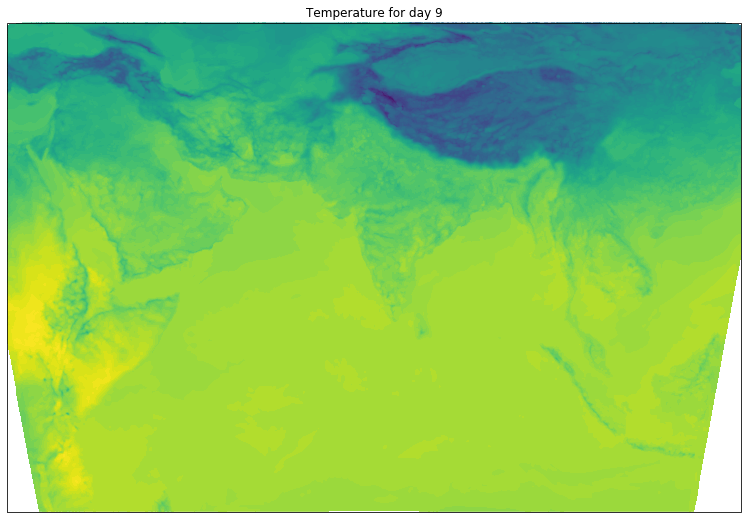

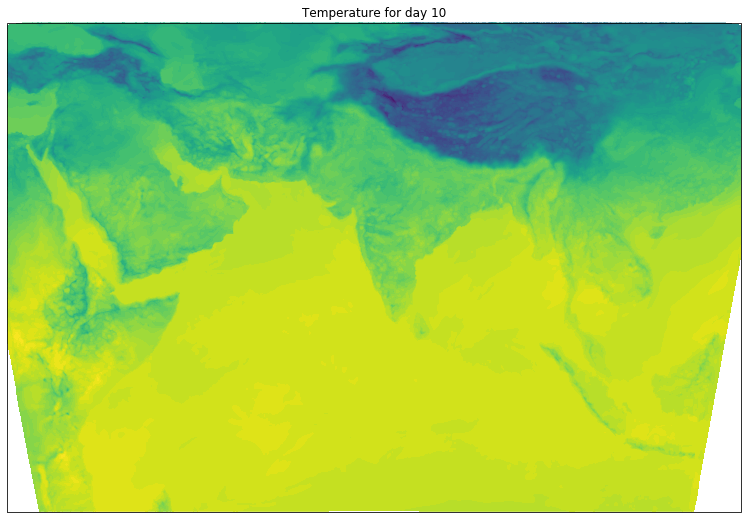

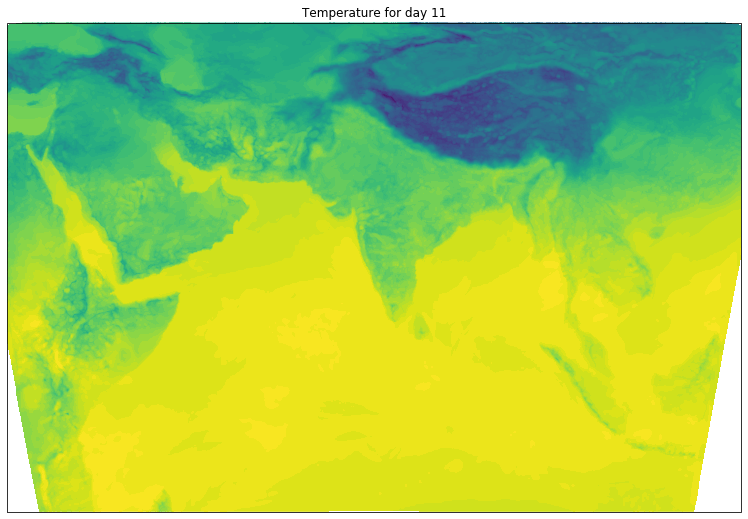

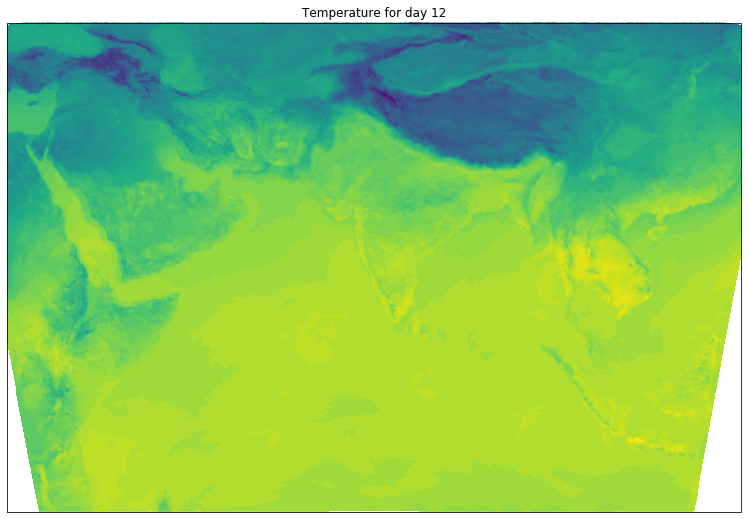

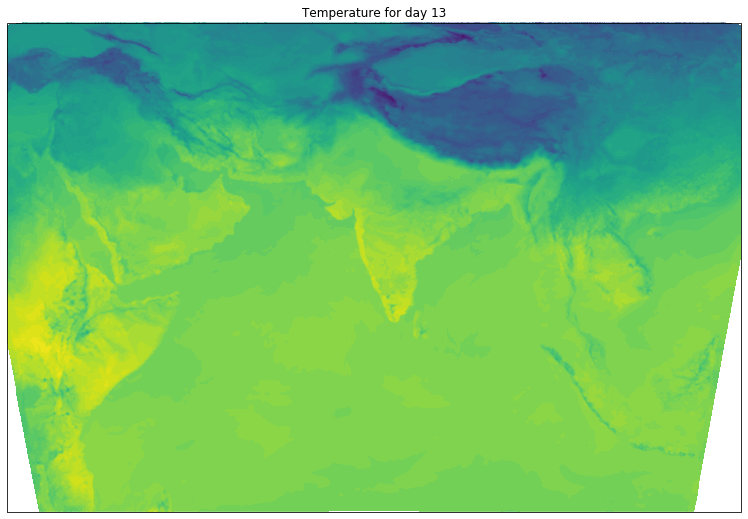

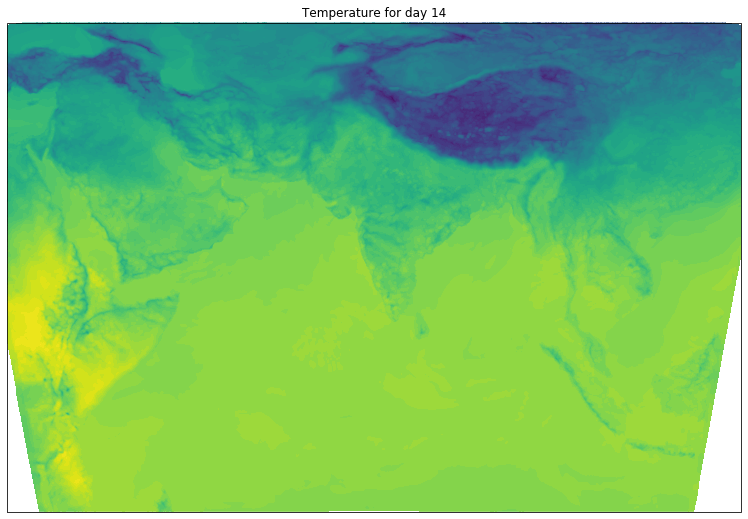

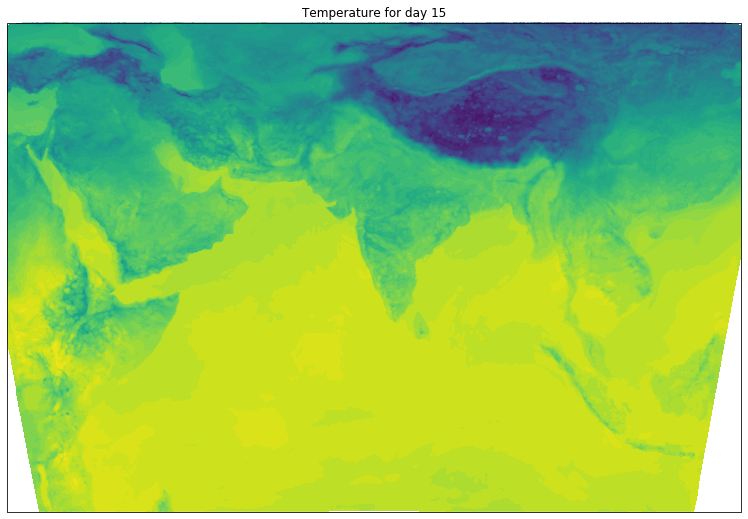

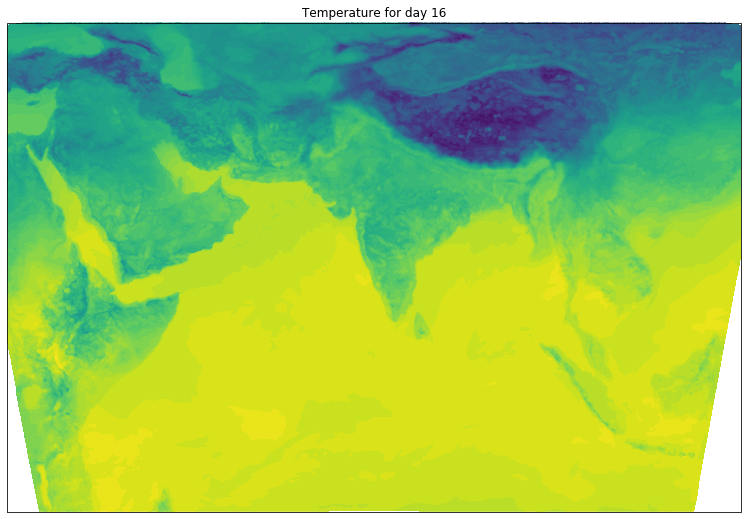

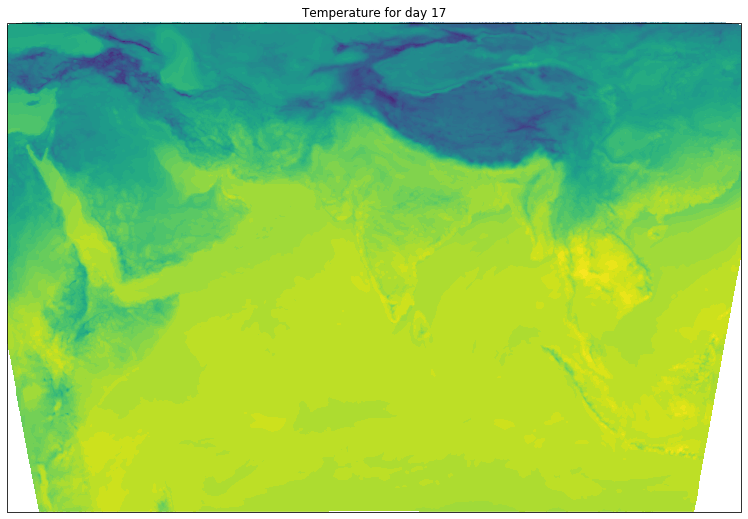

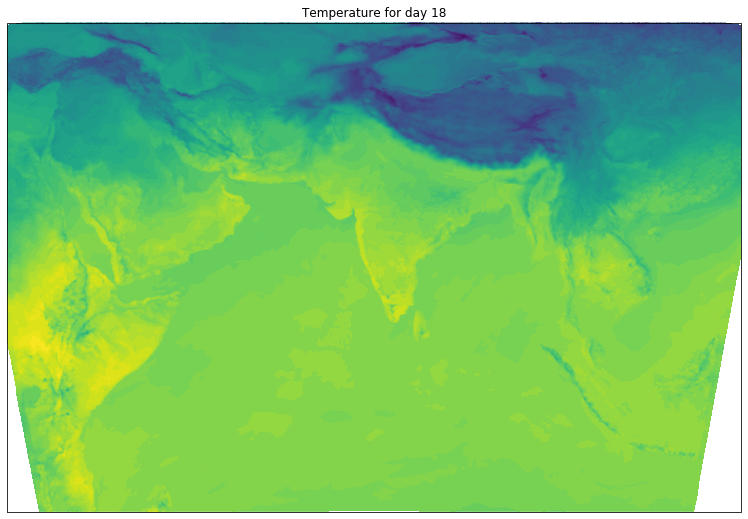

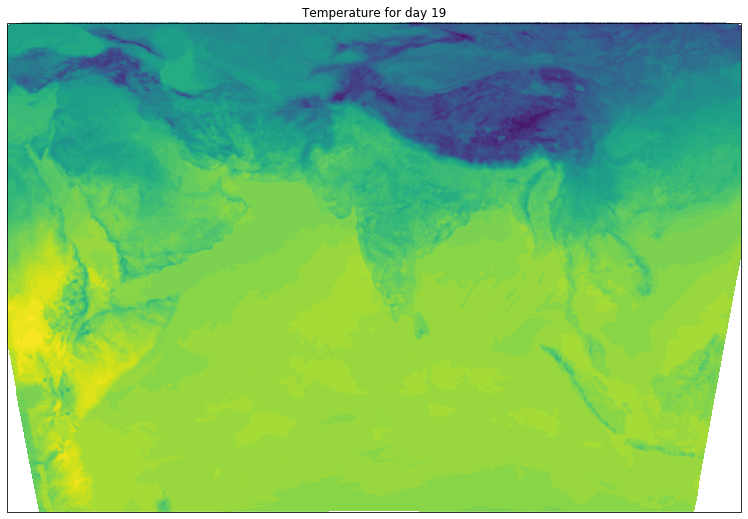

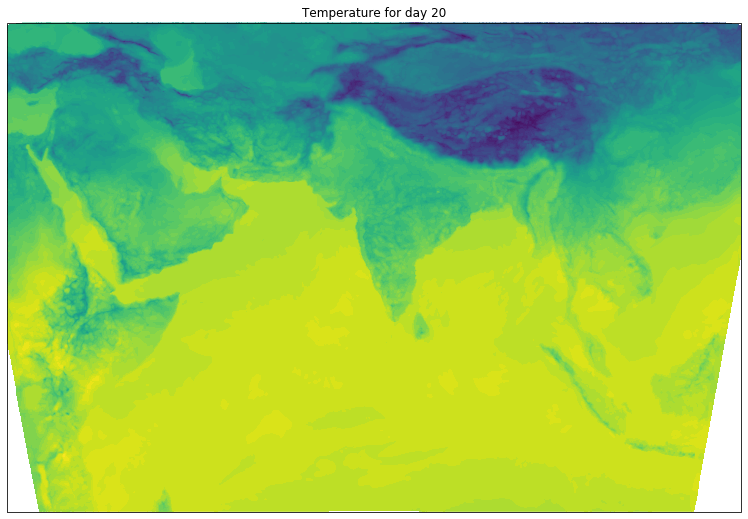

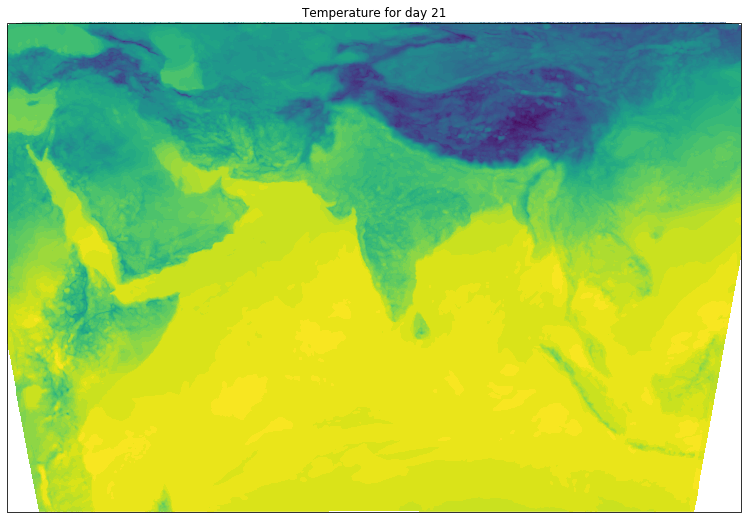

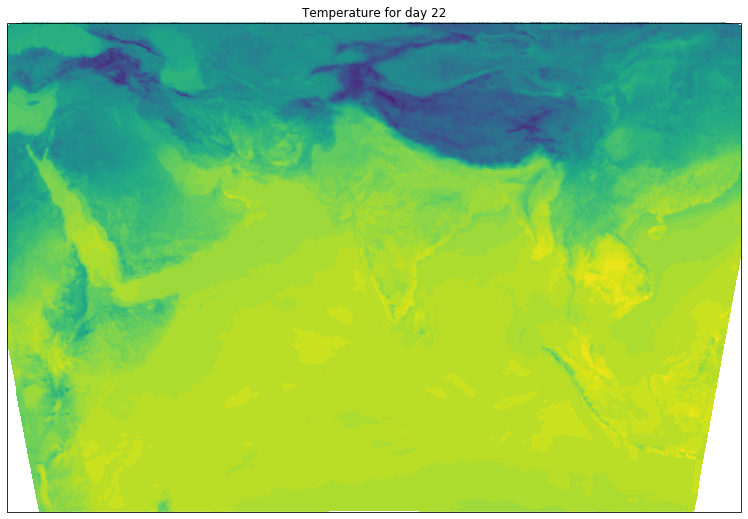

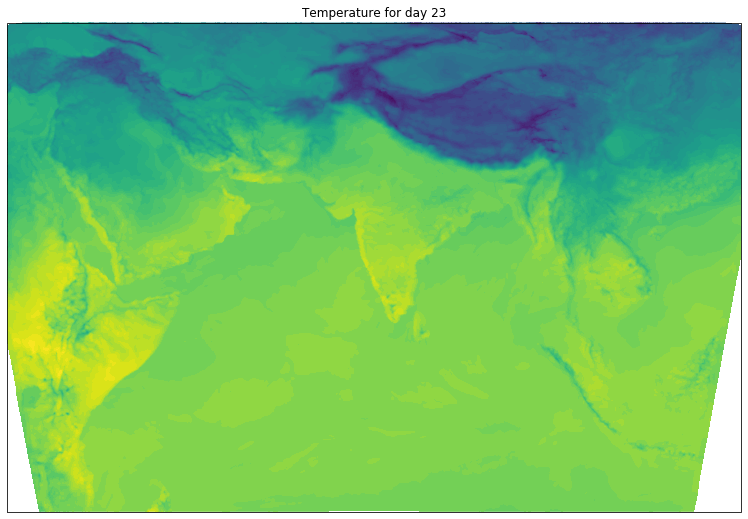

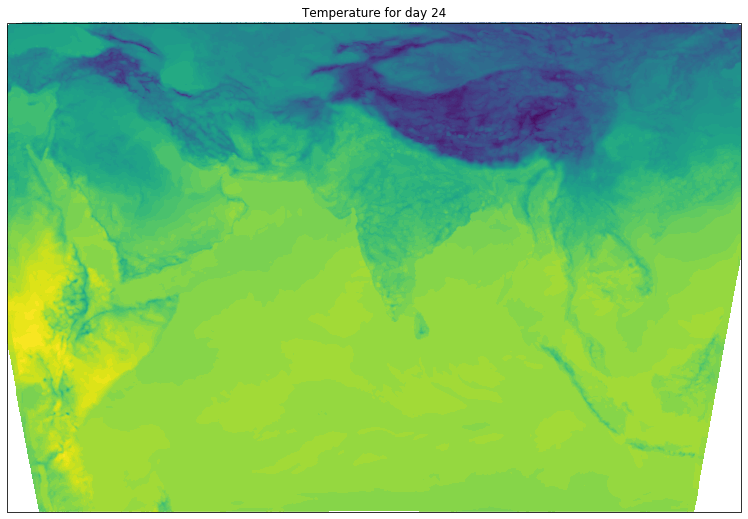

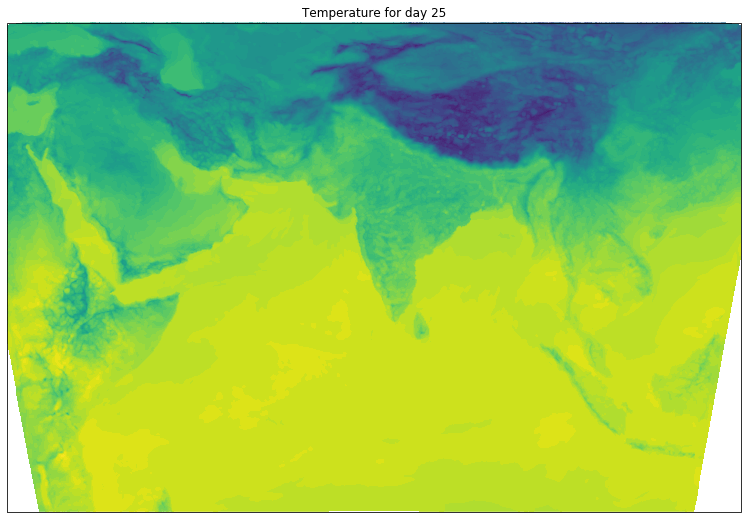

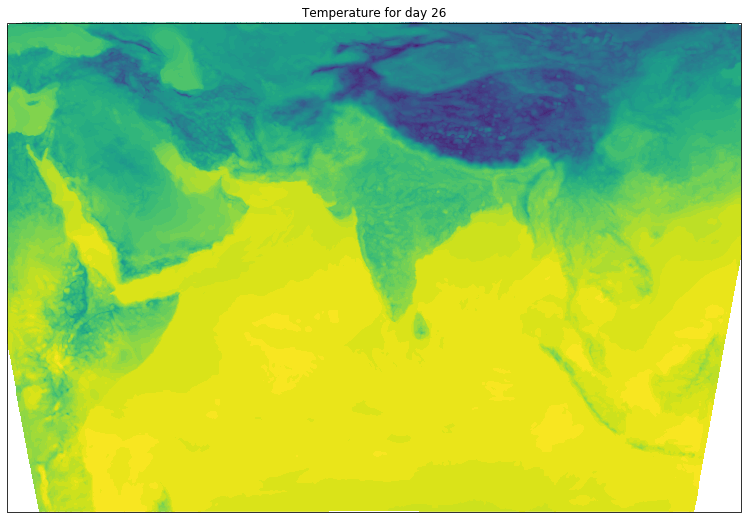

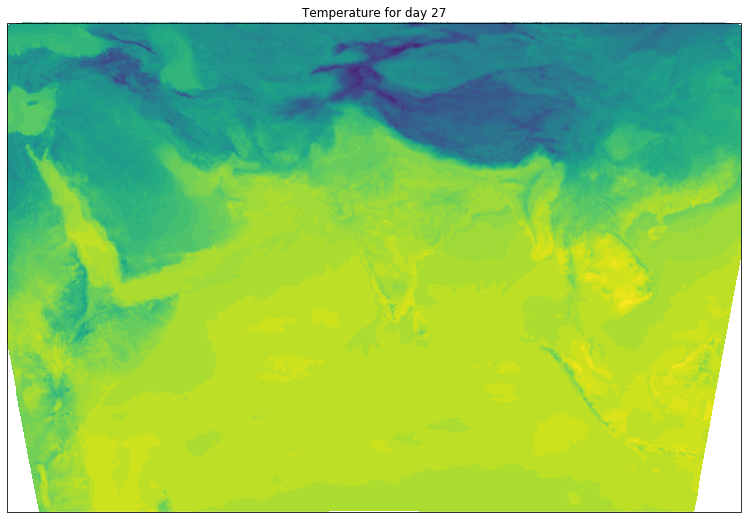

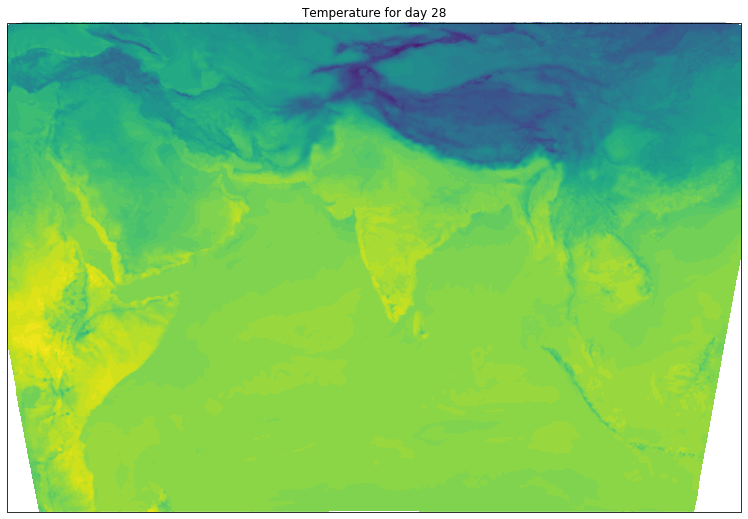

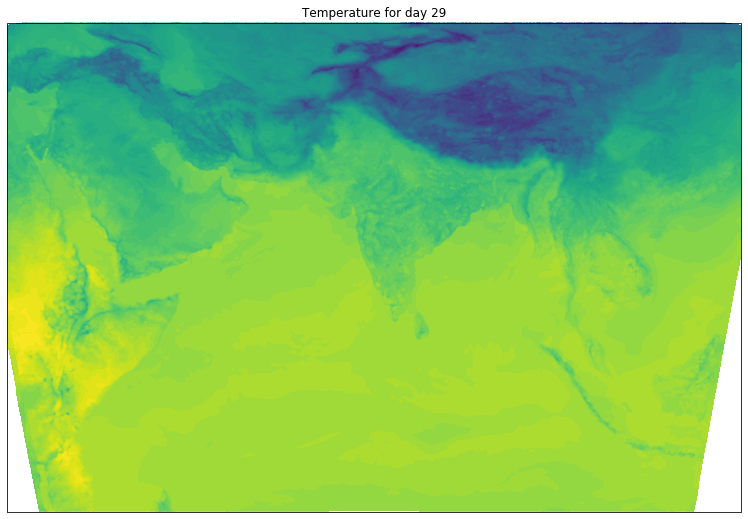

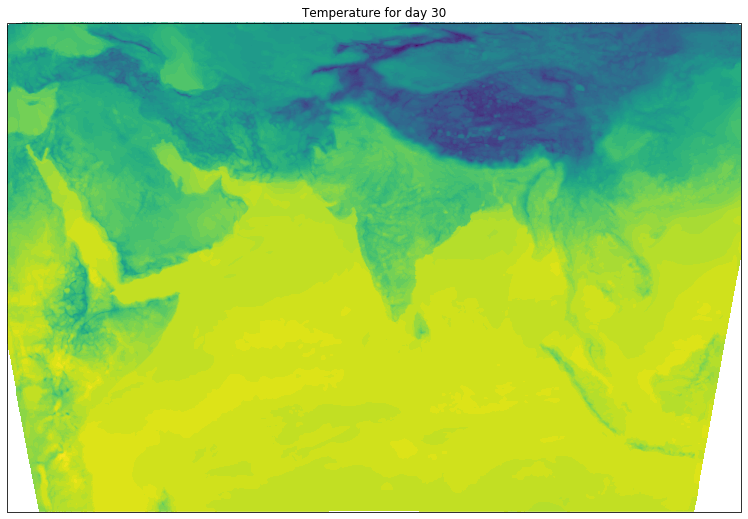

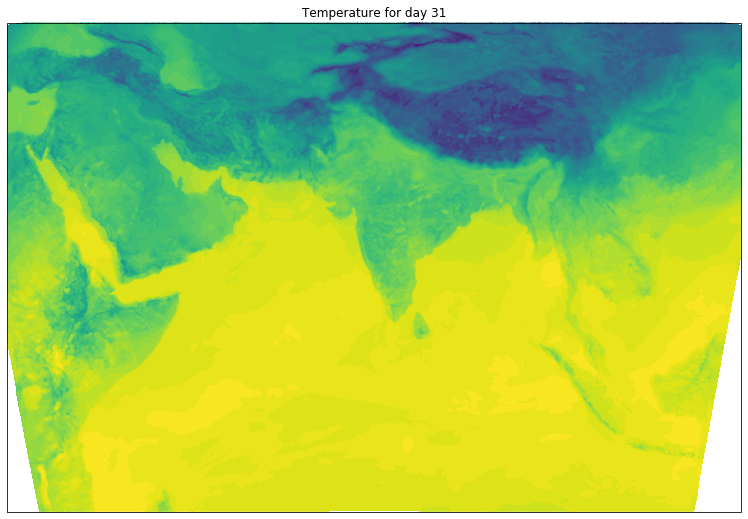

In [14]:
# loop for days 
days = np.arange(0,5)
# creating meshgrid from our list of spatial coordinates
lon, lat = np.meshgrid(longs,lats)
# generate a frame for each day
for i in days:
    # set the axes' spatial projection, styling, and title
    fig = plt.figure(figsize=(20,9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.coastlines()
    ax.set_title('Temperature for day '+ str(i+1))
    
    # generate the contour map
    plt.contourf(longs, lats, temp[i,], 60,
    transform=ccrs.PlateCarree())
    cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
    cb.set_label('K',size=12,rotation=0,labelpad=15)
    cb.ax.tick_params(labelsize=10)
    # save the figure and give a pause for visualization
    #plt.savefig(f’./output/{i+1}.jpg)
    plt.pause(1)
plt.show()

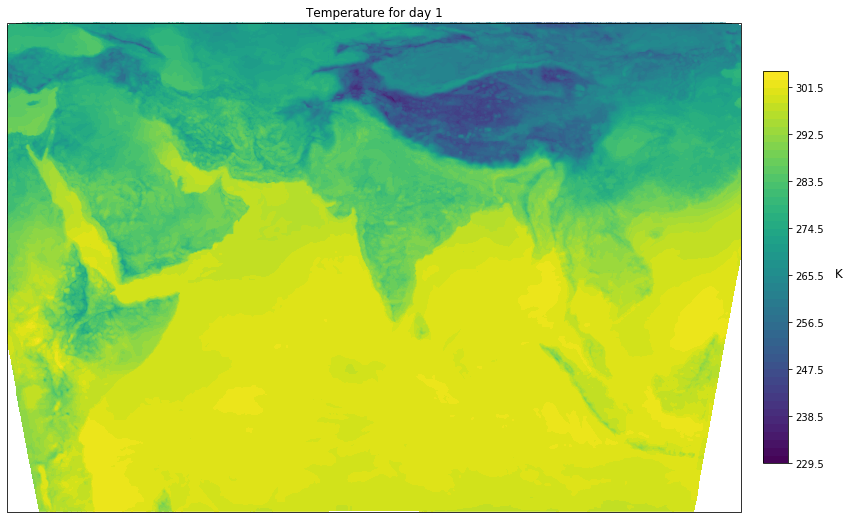

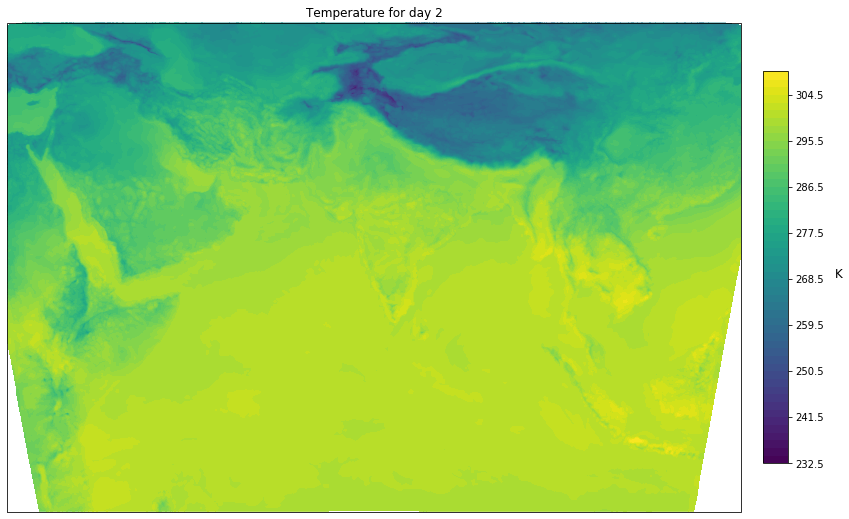

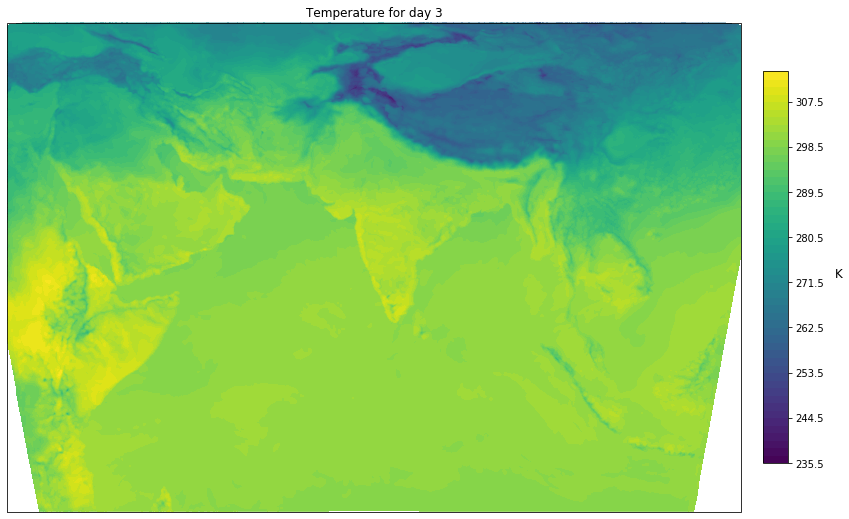

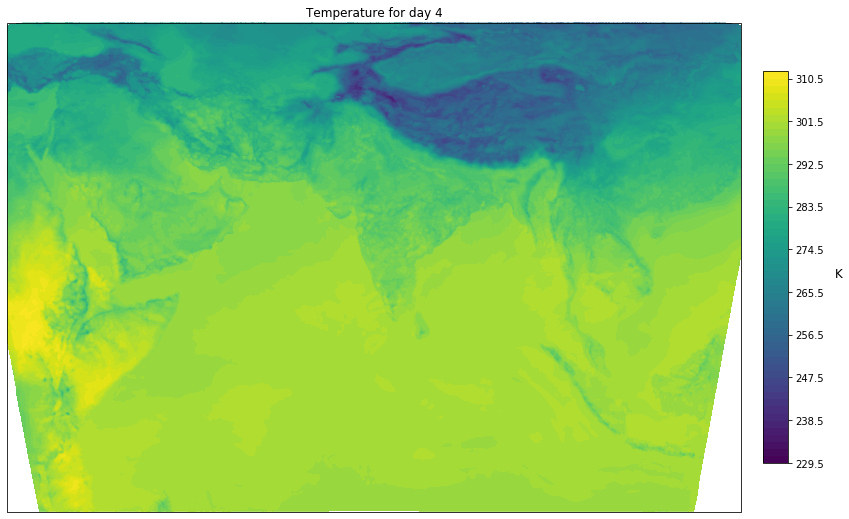

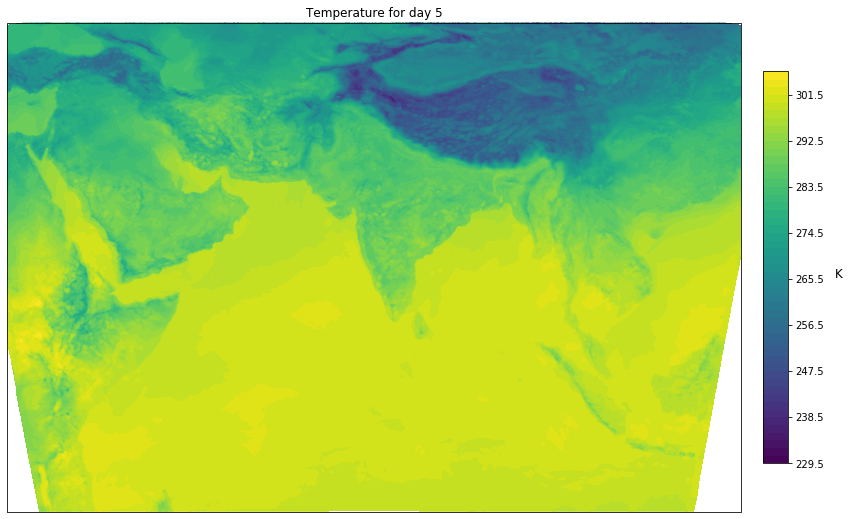

In [15]:
# loop for 365 days 
days = np.arange(0,5)
# creating meshgrid from our list of spatial coordinates
lon, lat = np.meshgrid(longs,lats)
# generate a frame for each day
for i in days:
    # set the axes' spatial projection, styling, and title
    fig = plt.figure(figsize=(20,9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.coastlines()
    ax.set_title('Temperature for day '+ str(i+1))
    
    # generate the contour map
    plt.contourf(longs, lats, temp[i,], 60,
    transform=ccrs.PlateCarree())
    cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
    cb.set_label('K',size=12,rotation=0,labelpad=15)
    cb.ax.tick_params(labelsize=10)
    # save the figure and give a pause for visualization
    #plt.savefig(f’./output/{i+1}.jpg)
    plt.pause(1)
plt.show()

In [3]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4 as nc

In [4]:
data = nc.Dataset('data1.nc', mode ='r')
print(type(data)) # print the type of the data 
print(data.variables.keys()) # print the variables in the data

<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['time', 'longitude', 'latitude', 'TMP_2m'])


In [16]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]
T2M = data.variables['TMP_2m'][1,:,:]

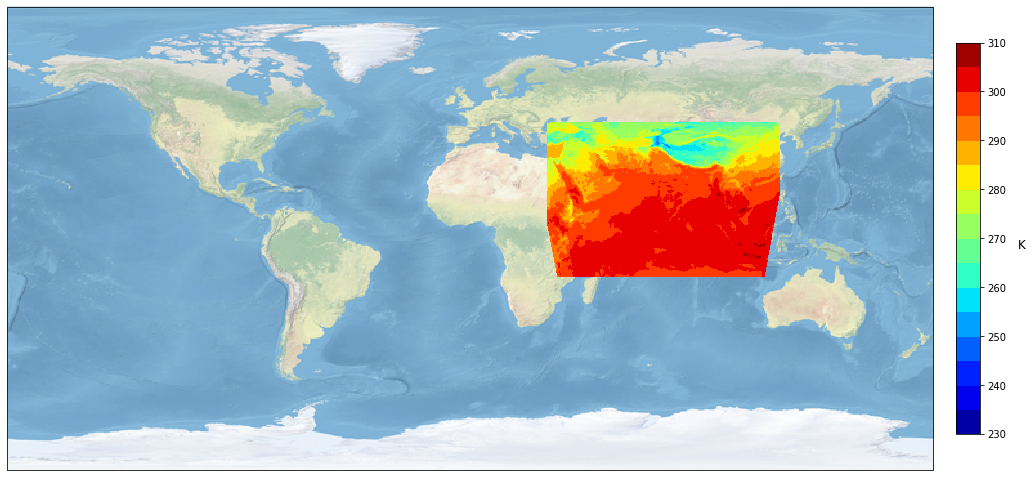

In [17]:
fig = plt.figure(figsize=(20,9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.set_global()
#ax.coastlines(resolution="110m",linewidth=1)
#ax.gridlines(linestyle='--',color='black')

# Set contour levels, then draw the plot and a colorbar
clevs = np.arange(230,311,5)
plt.contourf(lons, lats, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
plt.show()

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()


In [28]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
import glob
from netCDF4 import Dataset
import numpy as np

In [21]:
all_years = []

for file in glob.glob('Dataset Raw/*.nc'):
    #print(file[39:43])
    data = Dataset(file, 'r')
    #print(data)
    time = data.variables['time']
    #print(time)
    year = file[39:43]
    all_years.append(year)
    

2009
2014
1985
1989
1983
2013
1997
1979
2008
2002
2019
1988
2010
1992
2018
1998
2016
1993
2005
2007
1984
2017
1996
2004
1987
1986
2006
2003
1999
1990
2000
1994
1981
2001
2011
1995
2012
1980
2015
1982
1991


In [29]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)


1979
2019


In [48]:
date_range = pd.date_range(start = '1979-01-01', end=year_end + '-12-31', freq='M' )
df = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

In [47]:
date_range

DatetimeIndex(['1979-01-31', '1979-02-28', '1979-03-31', '1979-04-30',
               '1979-05-31', '1979-06-30', '1979-07-31', '1979-08-31',
               '1979-09-30', '1979-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=492, freq='M')

In [49]:
df

Temperature
1979-01-31          0.0
1979-02-28          0.0
1979-03-31          0.0
1979-04-30          0.0
1979-05-31          0.0
...                 ...
2019-08-31          0.0
2019-09-30          0.0
2019-10-31          0.0
2019-11-30          0.0
2019-12-31          0.0

[492 rows x 1 columns]

In [50]:
#defining lat and lon for the location
lat = 28.7041
lon = 77.1025


In [51]:
all_years.sort()

In [73]:
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset Raw/ncum_imdaa_reanl_HR_TMP-2m_' + str(yr) + '010100-' + str(yr) + '121500.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='M')
    for t_index in np.arange(len(d_range)):
        print('Recording the value for :'+str(d_range[t_index]))
        df.loc[d_range[t_index]]['Temperature'] = temp[t_index*2 , min_index_lat, min_index_lon]

Recording the value for :1979-01-31 00:00:00
Recording the value for :1979-02-28 00:00:00
Recording the value for :1979-03-31 00:00:00
Recording the value for :1979-04-30 00:00:00
Recording the value for :1979-05-31 00:00:00
Recording the value for :1979-06-30 00:00:00
Recording the value for :1979-07-31 00:00:00
Recording the value for :1979-08-31 00:00:00
Recording the value for :1979-09-30 00:00:00
Recording the value for :1979-10-31 00:00:00
Recording the value for :1979-11-30 00:00:00
Recording the value for :1979-12-31 00:00:00
Recording the value for :1980-01-31 00:00:00
Recording the value for :1980-02-29 00:00:00
Recording the value for :1980-03-31 00:00:00
Recording the value for :1980-04-30 00:00:00
Recording the value for :1980-05-31 00:00:00
Recording the value for :1980-06-30 00:00:00
Recording the value for :1980-07-31 00:00:00
Recording the value for :1980-08-31 00:00:00
Recording the value for :1980-09-30 00:00:00
Recording the value for :1980-10-31 00:00:00
Recording 

Recording the value for :1994-12-31 00:00:00
Recording the value for :1995-01-31 00:00:00
Recording the value for :1995-02-28 00:00:00
Recording the value for :1995-03-31 00:00:00
Recording the value for :1995-04-30 00:00:00
Recording the value for :1995-05-31 00:00:00
Recording the value for :1995-06-30 00:00:00
Recording the value for :1995-07-31 00:00:00
Recording the value for :1995-08-31 00:00:00
Recording the value for :1995-09-30 00:00:00
Recording the value for :1995-10-31 00:00:00
Recording the value for :1995-11-30 00:00:00
Recording the value for :1995-12-31 00:00:00
Recording the value for :1996-01-31 00:00:00
Recording the value for :1996-02-29 00:00:00
Recording the value for :1996-03-31 00:00:00
Recording the value for :1996-04-30 00:00:00
Recording the value for :1996-05-31 00:00:00
Recording the value for :1996-06-30 00:00:00
Recording the value for :1996-07-31 00:00:00
Recording the value for :1996-08-31 00:00:00
Recording the value for :1996-09-30 00:00:00
Recording 

Recording the value for :2011-01-31 00:00:00
Recording the value for :2011-02-28 00:00:00
Recording the value for :2011-03-31 00:00:00
Recording the value for :2011-04-30 00:00:00
Recording the value for :2011-05-31 00:00:00
Recording the value for :2011-06-30 00:00:00
Recording the value for :2011-07-31 00:00:00
Recording the value for :2011-08-31 00:00:00
Recording the value for :2011-09-30 00:00:00
Recording the value for :2011-10-31 00:00:00
Recording the value for :2011-11-30 00:00:00
Recording the value for :2011-12-31 00:00:00
Recording the value for :2012-01-31 00:00:00
Recording the value for :2012-02-29 00:00:00
Recording the value for :2012-03-31 00:00:00
Recording the value for :2012-04-30 00:00:00
Recording the value for :2012-05-31 00:00:00
Recording the value for :2012-06-30 00:00:00
Recording the value for :2012-07-31 00:00:00
Recording the value for :2012-08-31 00:00:00
Recording the value for :2012-09-30 00:00:00
Recording the value for :2012-10-31 00:00:00
Recording 

<Figure size 1440x648 with 0 Axes>

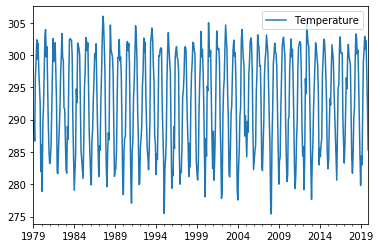

In [76]:
df.plot()

In [77]:
df.to_csv('Temp_Delhi_1979_2019.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('Temp_Delhi_1979_2019.csv')

In [6]:
X = np.array(df['Temperature'])

In [4]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

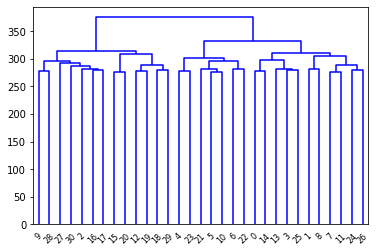

In [20]:
X
dendrogram = sch.dendrogram(sch.linkage(X[0:465],method='ward'))

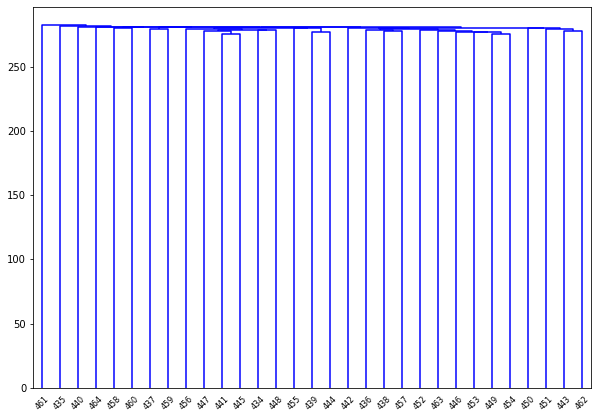

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X[0:465], 'single')

labelList = range(1, 465)

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending')
plt.show()


In [8]:
Dt = np.zeros(930).reshape(465, 2)
for i in range(465):
    Dt[i][0] = i + 1
    Dt[i][1] = X[i]

In [45]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7,

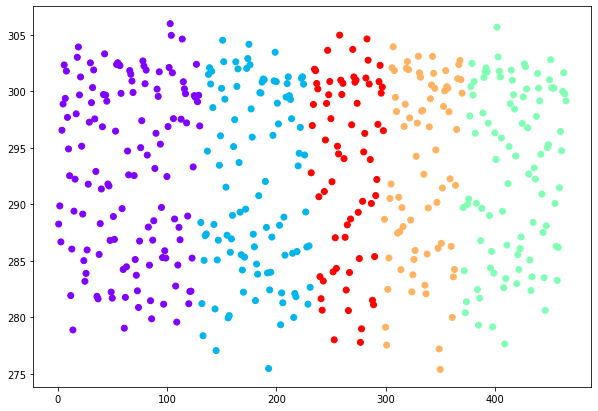

In [44]:
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

In [9]:
cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)


array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 19, 19,
       19, 19, 19, 19, 19

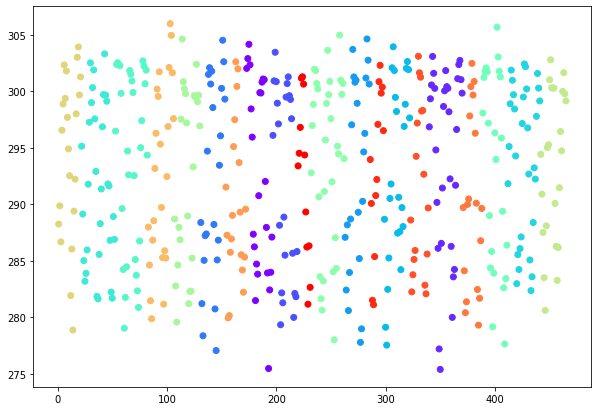

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')